# DIP ASSIGNMENT_4: Image Filters

### Import Labraries

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

### Load Image: the image used in this task represent an image with noise

In [2]:
img = cv.imread('image_noise.jpg')
fig = plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

### Convert the image into HSV color space and Apply Mean Filter: As we have known RGB color space dependent on one another and can be impossible to work on a separate pixel, thereofore we have converted the RGB color space into HSV color space so that we can work on the separate pixels.  By applying the mean filter on the HSV color space the  noise present in  the image as seen here is reduced thereby introducing new artefacts in the noise region.

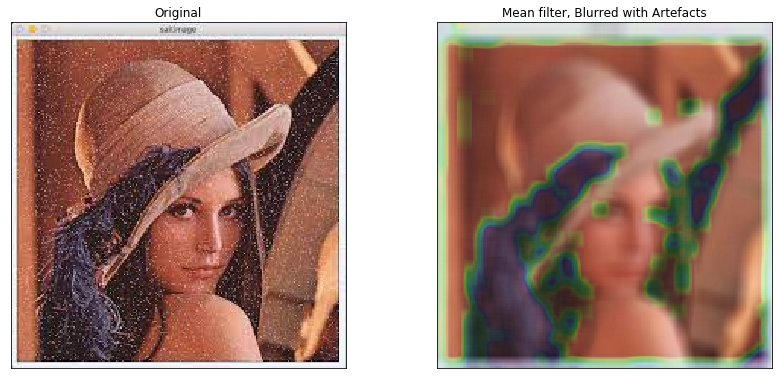

In [3]:
img = cv.cvtColor(img, cv.COLOR_BGR2HSV) # convert to HSV
figure_size = 10 # the dimension of the x and y axis of the kernal.
new_image = cv.blur(img,(figure_size, figure_size)) # apply blur function to average out rapid changes in pixel intensity
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(cv.cvtColor(img, cv.COLOR_HSV2RGB))   # Convert HSV color space back to RGB color scape
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(cv.cvtColor(new_image, cv.COLOR_HSV2RGB)) # Convert HSV color space back to RGB color space
plt.title('Mean filter, Blurred with Artefacts')
plt.xticks([])
plt.yticks([])
plt.show()

### Convert the image into GrayScale color space and Apply Mean Filter: In the same fashion we have applied the mean filter on GrayScale color space image as we have done with HSV color space image. From the mean filter result shown below for  GrayScale image, we observed that the extra objects(artefacts) introduced by Mean Filter for HSV has disappeared or not visible in Mean Filter for GrayScale image.

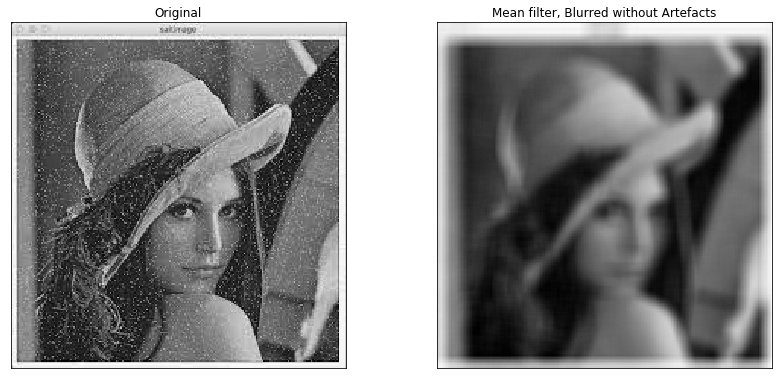

In [4]:
img2 = cv.cvtColor(img, cv.COLOR_HSV2BGR)  # Convert HSV color space into RGB color space
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY) # Convert RGB color space into GrayScale color space
figure_size = 10 # the dimension of the x and y axis of the kernal.
new_image = cv.blur(img2,(figure_size, figure_size)) # apply blur function to average out rapid changes in pixel intensity
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(img2, cmap='gray') # Display the GrayScale Image
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(new_image, cmap='gray') # Display the GrayScale Image
plt.title('Mean filter, Blurred without Artefacts')
plt.xticks([])
plt.yticks([])
plt.show()

### Apply Gaussian Filter on the RGB Image: Gaussian Filter is basically a weighted average of the surrounding pixels with some kernel of distinct estimation of the gaussian distribution that can help us to reduce image noise   and reduce detail. here some of the important parameters in the gaussian function are: (1) src => the input object representing the input image given as img. (2) ksize => here the size of the kernel is given as 5x5.  (3) sigmaX => the gaussian kernel standard deviation is given as 0

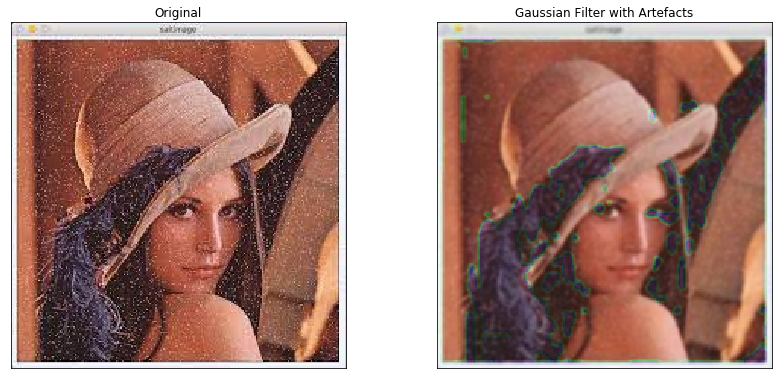

In [8]:
new_image=cv.GaussianBlur(img, (5,5),0) # the gaussian function
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(cv.cvtColor(img, cv.COLOR_HSV2RGB)) # Display original Image in RGB color Space
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(cv.cvtColor(new_image, cv.COLOR_HSV2RGB)) # Display the Input Image in RGB color Space
plt.title('Gaussian Filter with Artefacts')
plt.xticks([])
plt.yticks([])
plt.show()

### Apply Gaussian Filter on the GrayScale Image:  Gaussian Filter is basically a weighted average of the surrounding pixels with some kernel of distinct estimation of the gaussian distribution that can help us to reduce image noise and reduce detail. here some of the important parameters in the gaussian function are: (1) src => the input object representing the input image given as img2. (2) ksize => here the size of the kernel is given as 5x5. (3) sigmaX => the gaussian kernel standard deviation is given as 0


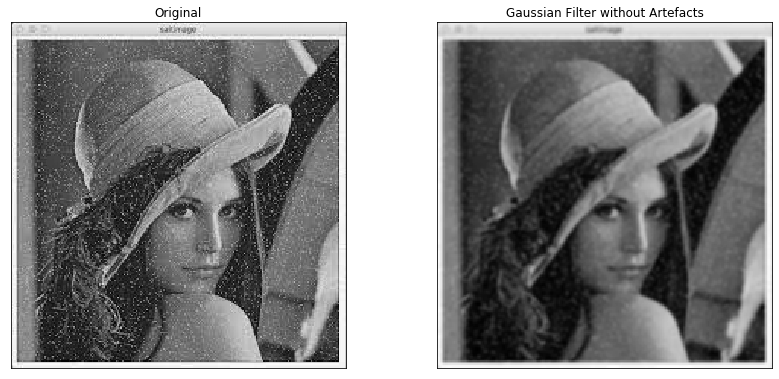

In [9]:
new_image_gauss = cv.GaussianBlur(img2, (5, 5),0) # the gaussian function
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(img2, cmap='gray') # Display original Image in GrayScale
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(new_image_gauss, cmap='gray') # Display Input Image in GrayScale 
plt.title('Gaussian Filter without Artefacts')
plt.xticks([])
plt.yticks([])
plt.show()

### Applying Median Filter: We have applied the Median Filter here in order to calculate the median of the pixel intensities surrounding the pixel's center. here some of the important parameters in the medianblur function are:  (1) src => the input object representing the input image given as img.  (2) ksize => here the size of the kernel is given as 5.  From the image output displayed below: It is obvious that median filter does a better job of removing salt and pepper noise as  we can clearly see that the input image looks by far better than our original image with no extra or additional artfects present in the resultant image.

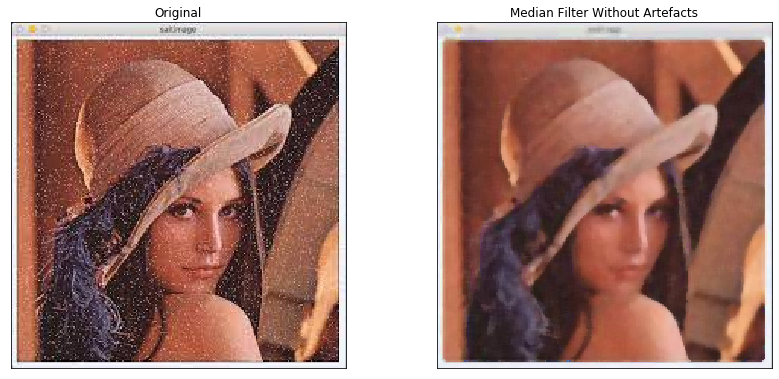

In [10]:
new_image =cv.medianBlur(img, 5) # medianblur function with kernel size 5
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(cv.cvtColor(img, cv.COLOR_HSV2RGB)) # Display the original image in RGB color space
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(cv.cvtColor(new_image, cv.COLOR_HSV2RGB)) # Display the resultant image in RGB color space
plt.title('Median Filter Without Artefacts')
plt.xticks([])
plt.yticks([])
plt.show()

### Apply Median Filter on the GrayScale Image:  We have applied the Median Filter here in order to calculate the median of the pixel intensities surrounding the pixel's center.  here some of the important parameters in the medianblur function are:  (1) src => the input object representing the input image given as img2.  (2) ksize => here the size of the kernel is given as 5.  we can clearly see that the input image looks somehow better than our original  image with no extra or additional artfects present in the GrayScale resultant  image.

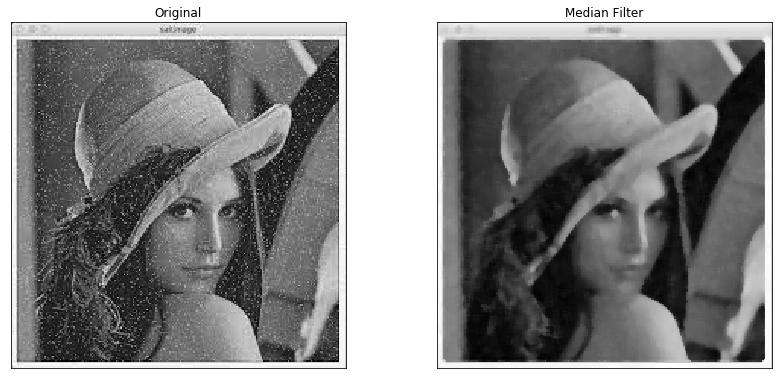

In [101]:
new_image = cv.medianBlur(img2, 5) # medianblur function with kernel size 5
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(img2, cmap='gray') # Display the original image in RGB color space
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(new_image, cmap='gray') # Display the resultant image in RGB color space
plt.title('Median Filter')
plt.xticks([])
plt.yticks([])
plt.show()

### Applying Conservative Filter: Just like other filter types, conservative filter can be used to remove salt and pepper noise. It focuses on minimum and maximum intensities within the neighborhood of a pixel. For instance, greater the intensity level at the pixel's center against the maximum value then the maximum value will be replaced. same is the case for minimum value.

In [102]:
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size): #  function to compute the conservative filter
    temp = []
    
    indexer = filter_size // 2 # dividing  the filter size by 2
    
    new_image = data.copy()
    
    nrow, ncol = data.shape
    
    for i in range(nrow):
        
        for j in range(ncol):
            
            for k in range(i-indexer, i+indexer+1):
                
                for m in range(j-indexer, j+indexer+1):
                    
                    if (k > -1) and (k < nrow):
                        
                        if (m > -1) and (m < ncol):
                            
                            temp.append(data[k,m])
                            
            temp.remove(data[i,j])
            
            
            max_value = max(temp)
            
            min_value = min(temp)
            
            if data[i,j] > max_value:
                
                new_image[i,j] = max_value
            
            elif data[i,j] < min_value:
                
                new_image[i,j] = min_value
            
            temp =[]
    
    return new_image.copy()

### Applying the Conservative filter to a gray scale image:  Display the conservative filter Image and the original image in GrayScale Color Space. From the below output, it's clear that this filter performed poorly for salt and pepper noise as it only gives a replica of the original image.

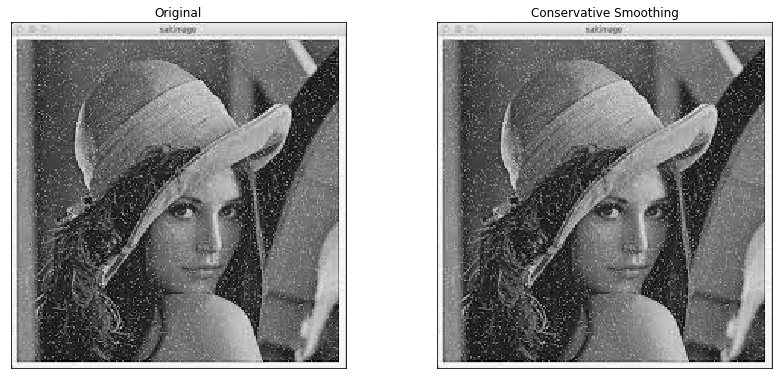

In [103]:
new_image = conservative_smoothing_gray(img2, 9) # the conservative smoothing  function with kernel 9
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(img2, cmap='gray') # display the original image in grayscale
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(new_image, cmap='gray') # display the resultant image in grayscale
plt.title('Conservative Smoothing')
plt.xticks([])
plt.yticks([])
plt.show()

### Applying Laplacian Filter: This filter focuses on the areas of rapid changes in the intensity level and for edge detection. After apllying the laplacian function on the original image, we then combine/add the original image with the Laplacian transformed image to get our final Laplacian resultant image. Still, the results of this filter is far from perfect for salt and pepper noise as shown below. 


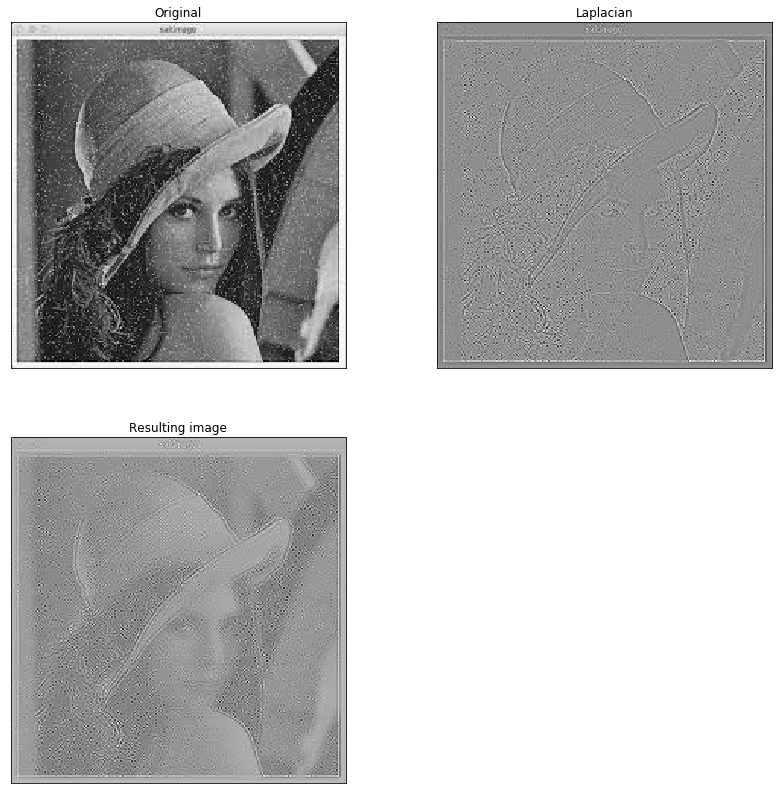

In [104]:
new_image = cv.Laplacian(img2, cv.CV_64F) # Laplacian function
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(img2, cmap='gray') # display the original image in grayscale color space
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(new_image, cmap='gray') # display the Laplacian image in grayscale color space
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])
plt.subplot(223)
plt.imshow(img2 + new_image, cmap='gray') # display the Combined (Resultant) image in grayscale color space
plt.title('Resulting image')
plt.xticks([])
plt.yticks([])
plt.show()

### Frequency Filter Implementation:  Here, we first convert the image into frequency domain representation of the image. Using fourier transform using discrete Fourier transform (DFT)and then apply it to our image.  Then we have tried to Shift zero-frequency component of discrete Fourier transform to  center of spectrum, and finally calculate the natural logarithm of the transformed fourier function. Display the Spatial Domain output as well as Frequency Domain Output.


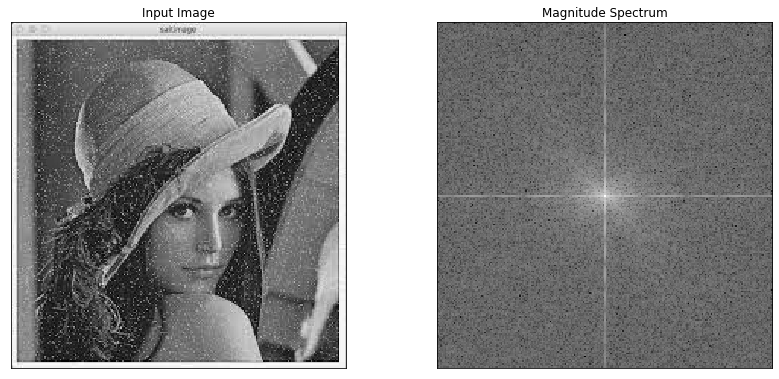

In [105]:
dft = cv.dft(np.float32(img2), flags = cv.DFT_COMPLEX_OUTPUT) # discrete fourier transform function
# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft) # function to shift the frquency
# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) #log of the transformed function
# plot both images
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(img2, cmap = 'gray') # Display the input image in grayscale(Spatial Doamin)
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(magnitude_spectrum, cmap = 'gray')# Display the Magnitude Spectrum of the image in grayscale(Frequency Domain)
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.show()

### Applying a Low Pass Filter to the image: Whenever we want to preseve the lowest frequencies for image frequencies below the threshold the Low Pass Filter is used. Low Pass Filter normally blurs the edges of the image in order to reduce noise in an image.
 

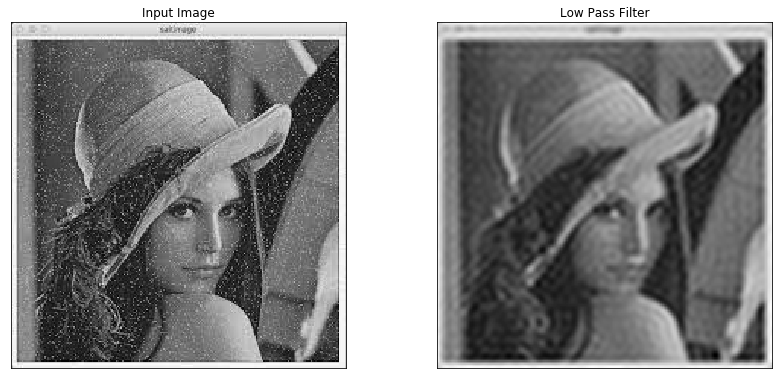

In [106]:
rows, cols = img2.shape
crow,ccol = rows//2 , cols//2  # dividing the image rows and columns by 2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8) # Return a new array of given shape and type, filled with zeros 
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift) # a function for invserse of the discrete fourier transform 
img_back = cv.idft(f_ishift) # a function for invserse of the frquency shift
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1]) # function to compute the magnitude of the vectors
# plot both images
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(img2, cmap = 'gray') # display the original image with grascale color space
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(img_back, cmap = 'gray') # display the image in Frequency filter(low pass filter) with grascale color space
plt.title('Low Pass Filter')
plt.xticks([])
plt.yticks([])
plt.show()

### crimmins complementary culling: To reduce the intensity of salt and pepper noise crimmins complementary culling algorithm can be used. It typically compares the intensities of pixels in an image using the 8 neighbors of its intensities.

In [107]:
def crimmins(data):
    new_image = data.copy()
    nrow = len(data)
    ncol = len(data[0])
    
    # Dark pixel adjustment
    
    # First Step
    # N-S
    for i in range(1, nrow):
        for j in range(ncol):
            if data[i-1,j] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(ncol-1):
            if data[i,j+1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow):
        for j in range(1, ncol):
            if data[i-1,j-1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    #NE-SW
    for i in range(1, nrow):
        for j in range(ncol-1):
            if data[i-1,j+1] >= (data[i,j] + 2):
                new_image[i,j] += 1
    data = new_image
    # Second Step
    # N-S
    for i in range(1, nrow-1):
        for j in range(ncol):
            if (data[i-1,j] > data[i,j]) and (data[i,j] <= data[i+1,j]):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j+1] > data[i,j]) and (data[i,j] <= data[i,j-1]):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i-1,j-1] > data[i,j]) and (data[i,j] <= data[i+1,j+1]):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i-1,j+1] > data[i,j]) and (data[i,j] <= data[i+1,j-1]):
                new_image[i,j] += 1
    data = new_image
    #Third Step
    # N-S
    for i in range(1, nrow-1):
        for j in range(ncol):
            if (data[i+1,j] > data[i,j]) and (data[i,j] <= data[i-1,j]):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j-1] > data[i,j]) and (data[i,j] <= data[i,j+1]):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i+1,j+1] > data[i,j]) and (data[i,j] <= data[i-1,j-1]):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(1, nrow-1):
        for j in range(1, ncol-1):
            if (data[i+1,j-1] > data[i,j]) and (data[i,j] <= data[i-1,j+1]):
                new_image[i,j] += 1
    data = new_image
    # Fourth Step
    # N-S
    for i in range(nrow-1):
        for j in range(ncol):
            if (data[i+1,j] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol):
            if (data[i,j-1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # NW-SE
    for i in range(nrow-1):
        for j in range(ncol-1):
            if (data[i+1,j+1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    # NE-SW
    for i in range(nrow-1):
        for j in range(1,ncol):
            if (data[i+1,j-1] >= (data[i,j]+2)):
                new_image[i,j] += 1
    data = new_image
    
    # Light pixel adjustment
    
    # First Step
    # N-S
    for i in range(1,nrow):
        for j in range(ncol):
            if (data[i-1,j] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(ncol-1):
            if (data[i,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow):
        for j in range(1,ncol):
            if (data[i-1,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow):
        for j in range(ncol-1):
            if (data[i-1,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # Second Step
    # N-S
    for i in range(1,nrow-1):
        for j in range(ncol):
            if (data[i-1,j] < data[i,j]) and (data[i,j] >= data[i+1,j]):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1, ncol-1):
            if (data[i,j+1] < data[i,j]) and (data[i,j] >= data[i,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i-1,j-1] < data[i,j]) and (data[i,j] >= data[i+1,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i-1,j+1] < data[i,j]) and (data[i,j] >= data[i+1,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # Third Step
    # N-S
    for i in range(1,nrow-1):
        for j in range(ncol):
            if (data[i+1,j] < data[i,j]) and (data[i,j] >= data[i-1,j]):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol-1):
            if (data[i,j-1] < data[i,j]) and (data[i,j] >= data[i,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i+1,j+1] < data[i,j]) and (data[i,j] >= data[i-1,j-1]):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(1,nrow-1):
        for j in range(1,ncol-1):
            if (data[i+1,j-1] < data[i,j]) and (data[i,j] >= data[i-1,j+1]):
                new_image[i,j] -= 1
    data = new_image
    # Fourth Step
    # N-S
    for i in range(nrow-1):
        for j in range(ncol):
            if (data[i+1,j] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # E-W
    for i in range(nrow):
        for j in range(1,ncol):
            if (data[i,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NW-SE
    for i in range(nrow-1):
        for j in range(ncol-1):
            if (data[i+1,j+1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    # NE-SW
    for i in range(nrow-1):
        for j in range(1,ncol):
            if (data[i+1,j-1] <= (data[i,j]-2)):
                new_image[i,j] -= 1
    data = new_image
    return new_image.copy()

### The results of one iteration of the crimmins complementary culling algorithm

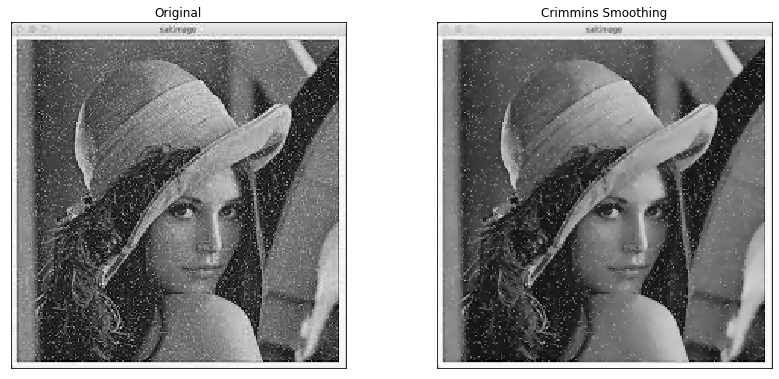

In [108]:
new_image = crimmins(img2) # crimmins function
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(img2, cmap='gray') # display the original image in grayscale color space
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(new_image, cmap='gray') # display the crimmins transformed image in grayscale color space
plt.title('Crimmins Smoothing')
plt.xticks([])
plt.yticks([])
plt.show()

### Unsharp Filter: The edges of the image are enhanced using unsharp filter with help of unsharpmark function with the help of this parameters  radius=2, percentage=150.

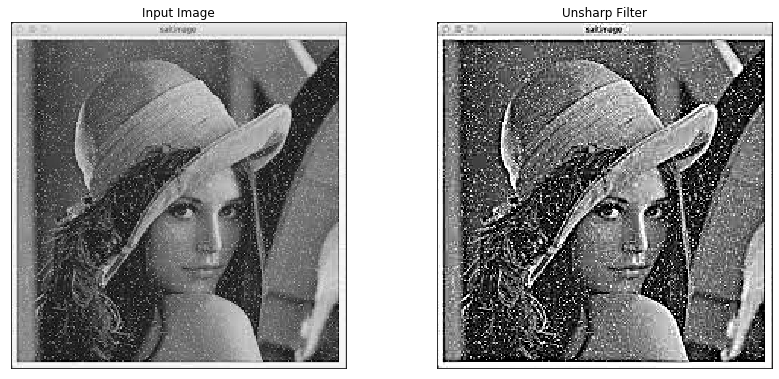

In [109]:
from PIL import Image
img2 = np.array(img2, dtype=np.uint8)
img2 = Image.fromarray(img2) # convert the image into array format
#img2=Image.fromarray(img2.astype('uint8'))
new_image=img2.filter(ImageFilter.UnsharpMask(radius=2, percent=150)) # apply the filter function(unsharp filter)
plt.figure(figsize=(14, 14))
plt.subplot(221)
plt.imshow(img2, cmap='gray') # display the input image in grayscale color space
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(222)
plt.imshow(new_image, cmap='gray') # display the unsharp filter transformed image in grayscale color space
plt.title('Unsharp Filter')
plt.xticks([])
plt.yticks([])
plt.show()

## Conclusion:

## In general, we have demonstrated how to remove a noise in an image as well as preserving the edges of the same image using different Filtering techniques available in digital image processing such as Mean Filter, Gaussian Filter, Median Filter, Conservative Filter, Laplacian Filter, Frequency Filter, Low Pass Filter, Crimmins Algorithm Filter and Unsharp Filter.


## We have also tried to analyze the Filtering behaviour in both RGB color space, HSV color space and GrayScale color space.


## finally, from the image with salt and pepper noise/spackle noise used in this task, it is obvious that Median Filter outperformed all other filters used here because it removed the   noise present in the image without adding an extra objects/artefacts in RGB color space.